# 3.4.1 Linear Programming

### Introduction

Linear Programming (LP) is a mathematical method for determining the best possible outcome or solution from a given set of parameters or list of requirements, which are linear in nature. It is widely used in various fields such as economics, business, engineering, and military applications to optimize processes like maximizing profit or minimizing cost, subject to a set of constraints.

The general form of a linear programming problem is:

1. **Objective Function**: A linear function to be maximized or minimized (e.g., maximize $$ z = c_1x_1 + c_2x_2 + \ldots + c_nx_n $$ ).
2. **Constraints**: A set of linear inequalities or equations (e.g., $$ a_{11}x_1 + a_{12}x_2 + \ldots + a_{1n}x_n \le b_1 $$ ).

## Readings/Videos:
- [Solve Optimisation Problems Using Linear Programming](https://readmedium.com/en/https:/medium.com/towards-data-science/how-to-solve-optimisation-problems-using-linear-programming-912cc951afbb)
- [Optimization Technique      Dr.Ghanim.M. Alwan ](https://www.researchgate.net/publication/330204775_Optimization_Technique)
- [The Art of Linear Programming - YouTube](https://youtu.be/E72DWgKP_1Y?si=6RTvGc4s5naMPk_G)

### Example Scenario

Consider a factory that produces two types of products: A and B. The factory earns a profit of $40 per unit of Product A and $30 per unit of Product B. The production of these products requires two types of resources: R1 and R2. Each unit of Product A requires 2 units of R1 and 1 unit of R2, while each unit of Product B requires 1 unit of R1 and 2 units of R2. The factory has a maximum of 100 units of R1 and 80 units of R2 available. The objective is to determine how many units of each product the factory should produce to maximize profit.

This problem can be formulated as a linear programming problem:
- **Objective Function**: Maximize $$ z = 40x_1 + 30x_2 $$
- **Constraints**:
  
$$ 2x_1 + x_2 \le 100 $$ (Resource R1)
$$ x_1 + 2x_2 \le 80 $$ (Resource R2)
$$ x_1, x_2 \ge 0 $$ (Non-negativity)

In [1]:
import numpy as np
from scipy.optimize import linprog

In [2]:
# Coefficients of the objective function (profit per unit of Product A and Product B)
c = [-40, -30]

# Coefficients of the inequality constraints (Resource usage)
A = [
    [2, 1],  # Resource R1 constraint coefficients
    [1, 2]   # Resource R2 constraint coefficients
]

# Right-hand side of the inequality constraints (Resource availability)
b = [100, 80]

In [3]:
# Bounds for the decision variables (non-negativity)
x_bounds = (0, None)
y_bounds = (0, None)

In [4]:
# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

# Extract the results
units_A, units_B = result.x
max_profit = -result.fun

print(f"Optimal number of units for Product A: {units_A}")
print(f"Optimal number of units for Product B: {units_B}")
print(f"Maximum profit: ${max_profit:.2f}")

Optimal number of units for Product A: 40.0
Optimal number of units for Product B: 20.0
Maximum profit: $2200.00


In [5]:
# Visualization
import matplotlib.pyplot as plt

# Plot the feasible region
x = np.linspace(0, 60, 400)
y1 = (100 - 2*x)  # R1 constraint
y2 = (80 - x) / 2  # R2 constraint

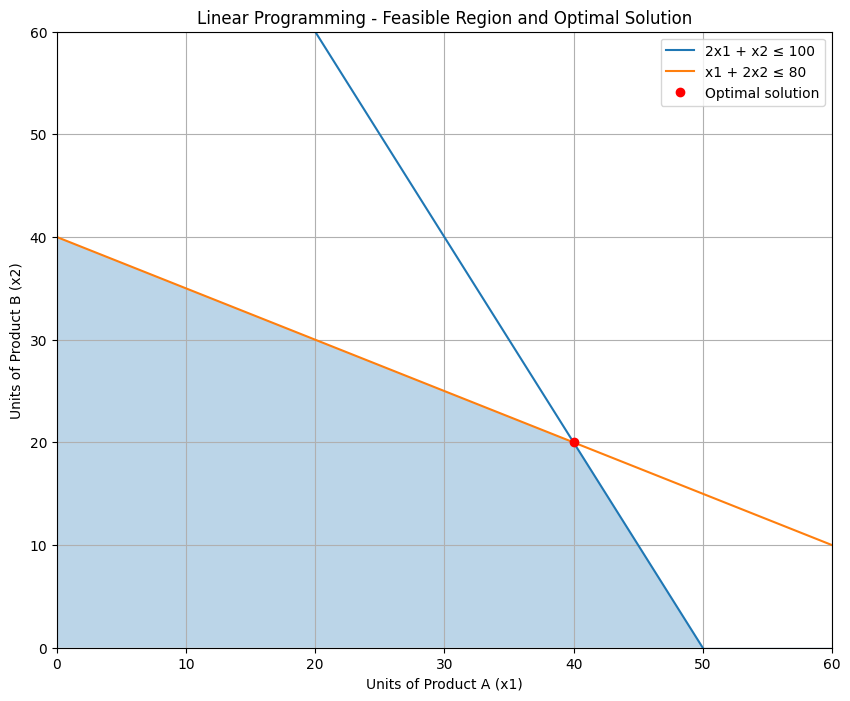

In [6]:
plt.figure(figsize=(10, 8))
plt.plot(x, y1, label='2x1 + x2 ≤ 100')
plt.plot(x, y2, label='x1 + 2x2 ≤ 80')
plt.xlim(0, 60)
plt.ylim(0, 60)

# Fill feasible region
y = np.minimum(y1, y2)
plt.fill_between(x, y, alpha=0.3)

# Plot the optimal point
plt.plot(units_A, units_B, 'ro', label='Optimal solution')
plt.xlabel('Units of Product A (x1)')
plt.ylabel('Units of Product B (x2)')
plt.title('Linear Programming - Feasible Region and Optimal Solution')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

Linear Programming is a powerful tool for optimization in various fields. In this example, we demonstrated how to solve a linear programming problem to maximize profit for a factory producing two types of products with limited resources. We formulated the problem, defined the objective function and constraints, and used the `linprog` function from the `scipy.optimize` module to find the optimal solution.

The solution provided the optimal number of units for each product to maximize the profit while satisfying all resource constraints. Additionally, the visualization helped in understanding the feasible region and the optimal solution graphically.

By applying linear programming techniques, businesses and organizations can make informed decisions to optimize their operations and achieve their goals efficiently.
